In [4]:
import ete3
from Bio import Phylo
from io import StringIO
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import os
from collections import Counter

In [16]:
import seaborn as sns

In [3]:
os.chdir('../')

In [4]:
from mtDNAsim.sim_utils import *

In [24]:
mts_full = pickle.load(open('/data3/wangkun/mtsim_res/res_1113/linear_/688370/mt_allmuts_mid_0.1_688370.pkl', 'rb'))

In [25]:
def mut_freq(mt_muts, max_mut_id = None, sel_cells=None):
    if sel_cells is None:
        sel_cells = list(mt_muts.keys())
    if not max_mut_id:
        max_mut_id = max([max([max(list(i)+[0]) for i in mt_muts[j]]+[0]) for j in sel_cells])
    max_mut_id += 1
    mut_freqs = []
    cell_names = []
    for cell in tqdm(sel_cells):
        mut_pos = np.zeros((len(mt_muts[cell]), max_mut_id))
        for ind, mt in enumerate(mt_muts[cell]):
            mut_pos[ind][list(mt)] = 1
        mut_freqs.append(mut_pos.sum(0)/len(mt_muts[cell]))
        cell_names.append(cell)
    mf = pd.DataFrame(mut_freqs, index=cell_names)
    mf = mf[mf.columns[mf.sum()>0]]
    return mf
def rs_cvt(mts_rs):
    mts_new = dict()
    n_cells = []
    for i in mts_rs:
        n_cells.append(len(mts_rs[i]))
    living_cells = np.array(list(mts_rs.keys()))[np.array(n_cells)!=0]
    for cell in living_cells:
        for cnt, c in enumerate(mts_rs[cell]):
            mts_new[f'{cell}_{cnt}'] = c
    return mts_new

81
437.0
364
480.0
357
491.0
374
498.0
364
492.0


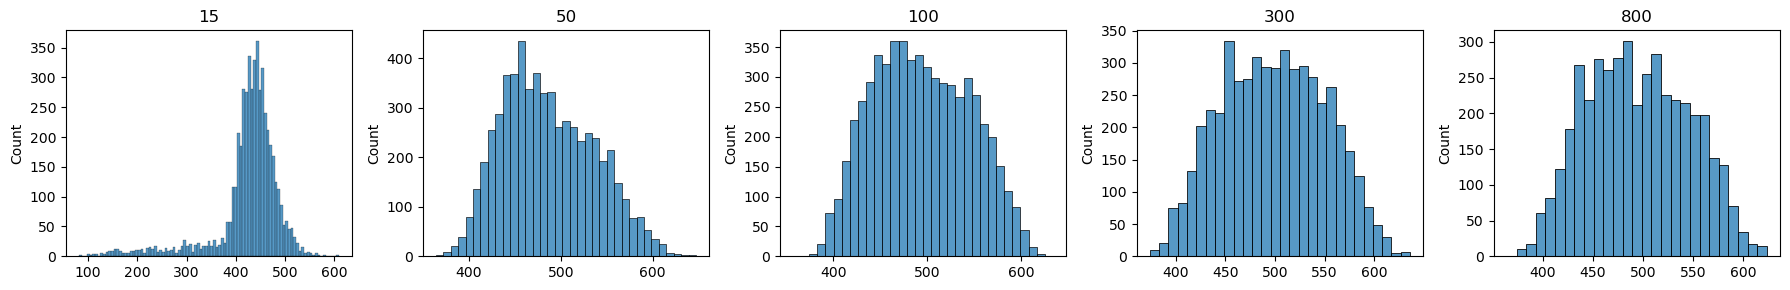

In [44]:
fig, ax = plt.subplots(1, 5, figsize=(18,3))
for ind, gen in enumerate([15,50,100,300,800]): 
    mts = pickle.load(open(f'/data3/wangkun/mtsim_res/res_1113/linear_/688370/mt_allmuts_mid_0.1_688370_{gen}_rs.pkl', 'rb'))
    mts = rs_cvt(mts)
    n_mts = []
    for i in mts:
        n_mts.append(len(mts[i]))
    print(min(n_mts))
    print(np.median(n_mts))
    sns.histplot(n_mts, ax=ax[ind])
    ax[ind].set_title(f'{gen}')
plt.tight_layout()

In [27]:
np.array(list(mts.keys()))[np.argsort(np.array([len(mts[i]) for i in mts.keys()]))[::-1]][:20]

array(['<23_917>_37', '<23_917>_36', '<23_917>_39', '<23_917>_40',
       '<24_2791>_124', '<23_917>_38', '<24_2791>_116', '<24_2791>_120',
       '<24_2791>_123', '<18_6027>_625', '<24_2791>_105', '<18_6027>_628',
       '<24_2791>_121', '<24_2791>_104', '<24_2791>_103', '<24_2791>_84',
       '<18_6027>_639', '<24_2791>_16', '<24_2791>_112', '<18_6027>_631'],
      dtype='<U13')

In [28]:
np.sort(np.array([len(mts[i]) for i in mts.keys()]))[::-1][:20]

array([2097, 2091, 2081, 2019, 1982, 1977, 1945, 1934, 1923, 1909, 1895,
       1889, 1868, 1867, 1859, 1853, 1839, 1835, 1826, 1826])

In [11]:
mts = rs_cvt(mts)

In [12]:
freq = mut_freq(mts)

100%|██████████| 3110/3110 [00:10<00:00, 296.56it/s] 


In [39]:
with open('/data3/wangkun/mtsim_res/res_1113/linear_/688370/linear_tree_gt_688370.nwk', 'r') as f:
    tree_file = f.readlines()
tree = Phylo.read(StringIO(tree_file[0]), format='newick')
sel_cells = [i.name for i in tree.get_terminals()]

In [38]:
from collections import defaultdict

In [40]:
n_mts = defaultdict(list)
for i in mts_full.keys():
    n_mts[int(i.split('_')[0][1:])].append(len(mts_full[i]))

In [41]:
n_mts[1]

[407, 385]

In [42]:
x, y = [], []
for i in n_mts:
    x.append([i]*len(n_mts[i]))
    y.append(n_mts[i])

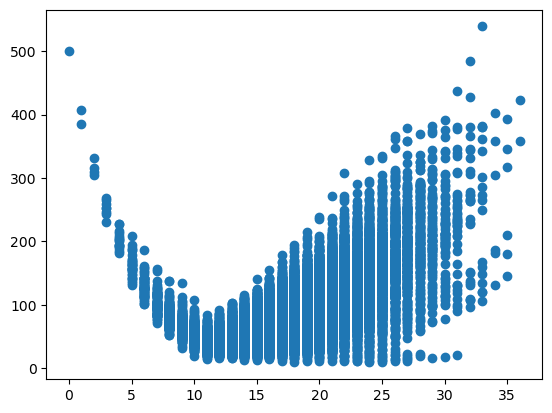

In [43]:
plt.scatter(sum(x,[]), sum(y,[]))

(array([1.041e+03, 2.146e+03, 1.109e+03, 4.760e+02, 1.540e+02, 4.600e+01,
        2.000e+01, 7.000e+00, 0.000e+00, 1.000e+00]),
 array([ 11. ,  63.8, 116.6, 169.4, 222.2, 275. , 327.8, 380.6, 433.4,
        486.2, 539. ]),
 <BarContainer object of 10 artists>)

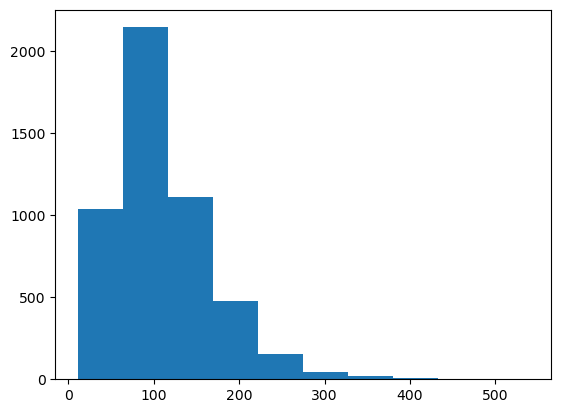

In [37]:
plt.hist(n_mts)

In [140]:
cnt = 0
for i in freq.index:
    if '21_3595' in i:
        cnt+=1

In [141]:
cnt

491

In [142]:
freq.shape

(5043, 41)

In [125]:
c2831 = []
# c102 = []
for cell_name in tqdm(mts.keys()):
    if 2831 in sum([list(i) for i in mts[cell_name]], []):
        c2831.append(cell_name)
    # if 102 in sum([list(i) for i in mts[cell_name]], []):
    #     c102.append(cell_name)   

  0%|          | 0/5043 [00:00<?, ?it/s]

In [128]:
c2831_full = []
# c102_full = []
for cell_name in tqdm(mts_full.keys()):
    if 2831 in sum([list(i) for i in mts_full[cell_name]], []):
        c2831_full.append(cell_name)
    # if 102 in sum([list(i) for i in mts_full[cell_name]], []):
    #     c102_full.append(cell_name)   

  0%|          | 0/26310 [00:00<?, ?it/s]

In [145]:
n_102

20

In [162]:
np.mean([len(mts[f'<21_3595>_{i}']) for i in range(300)])

168.34

In [163]:
len(mts_full[f'<0_0>'])

500

In [122]:
n_6415

10